In [1]:
!pip install -q autoviz
!pip install -q -U --pre pycaret
print('Hi')

Hi


In [2]:
!pip -q install transformers
!pip -q install torch
print('i')

i


In [3]:
import autoviz
print(autoviz.__version__)


Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
0.1.806


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from pycaret import regression
from sklearn.model_selection import cross_val_score
print('i')

i


In [26]:
df = pd.read_csv('D:\\Phuong - Mobifone R&D\\1. DE TAI -SANG KIEN\\DE TAI\\2. De tai 2023\\2. Phising system\\dataset\\URL\\malicious_phish.csv', nrows=1000)
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement


In [28]:
df.shape

(1000, 2)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['url', 'type']

In [31]:
le = LabelEncoder()

# Fit and transform the data
encoded_data = le.fit_transform(df['type'])

print(encoded_data)

[3 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0
 0 2 1 3 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 3 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 3 0 0 1 0 0 0 3 0 1 0 0 1 0 1 0 0 1 3 3 0 0 0 0
 1 0 0 0 2 0 1 0 0 0 0 0 0 1 0 3 0 0 0 0 0 1 0 0 0 0 1 0 3 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 2 0 3 0 0 0 1 1 0 0 1 3 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 1 0 0 0 1 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 1 0 2 0 0 2 0 0 3 0 0 0 0 3 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 1 0
 0 0 0 1 1 0 2 0 0 0 3 0 0 0 0 0 3 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 2 0 0 0 0 0 0 0 3 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 3 0 1
 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 3 3 3 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [32]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,defacement
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,defacement
...,...,...
995,youtube.com/watch?v=EcGsM-PNQHQ,benign
996,bloomberg.com/news/2011-08-28/dust-bowl-in-texas-means-cotton-bottoming-with-rick-perry-praying-for-rain.html,benign
997,http://www.slavia.sk/home,defacement
998,innerearbrigade.com/,benign


In [33]:
df['type'] = encoded_data

In [34]:
df

,url,type
0,br-icloud.com.br,3
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15,1
4,http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0,1
...,...,...
995,youtube.com/watch?v=EcGsM-PNQHQ,0
996,bloomberg.com/news/2011-08-28/dust-bowl-in-texas-means-cotton-bottoming-with-rick-perry-praying-for-rain.html,0
997,http://www.slavia.sk/home,1
998,innerearbrigade.com/,0


In [35]:
df.isnull().any()

url     False
type    False
dtype: bool

In [36]:
df['type'] = encoded_data

In [37]:
# Count the number of instances in each class
class_counts = df['type'].value_counts()

# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
type
0    734
1    181
3     54
2     31
Name: count, dtype: int64


<Axes: xlabel='type', ylabel='count'>

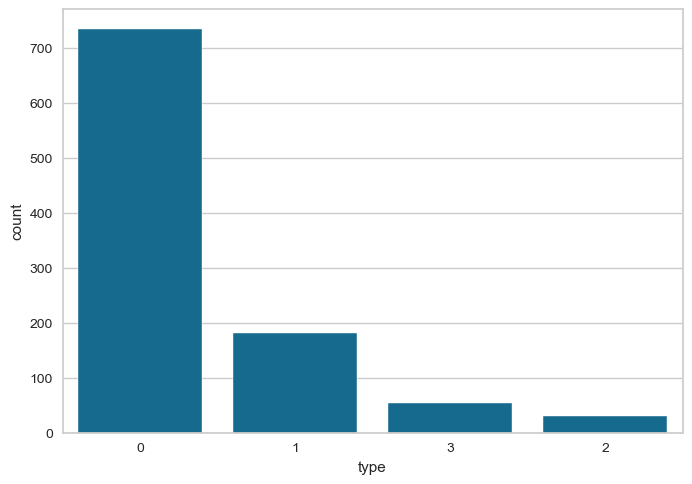

In [38]:
sns.countplot(x = 'type', data = df, order = df['type'].value_counts().index)

In [39]:
from transformers import BertModel, BertTokenizer
import torch

# Load the pre-trained BERT model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [40]:
# Define a function to extract features for each transaction
def extract_features(text):
    # Tokenize the text
    input_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)])
    # Get the hidden states for each token
    with torch.no_grad():
        outputs = model(input_ids)
        hidden_states = outputs[2]
    # Concatenate the last 4 hidden states
    token_vecs = []
    for layer in range(-4, 0):
        token_vecs.append(hidden_states[layer][0])
    # Calculate the mean of the last 4 hidden states
    features = []
    for token in token_vecs:
        features.append(torch.mean(token, dim=0))
    # Return the features as a tensor
    return torch.stack(features)
print('a')

a


In [41]:
# Extract features for each transaction
features = []
for i in range(len(df)):
    features.append(extract_features(df.iloc[i]["url"]))
# Concatenate the features and convert to a numpy array
features = torch.cat(features).numpy()

In [42]:
features

array([[ 0.20866257, -0.30191895,  0.08405146, ..., -0.6917096 ,
         0.32647485,  0.46026862],
       [ 0.16422981, -0.33757487, -0.01675414, ..., -0.50350505,
         0.23100549,  0.60487705],
       [ 0.18217392, -0.25289014, -0.0633971 , ..., -0.27169916,
         0.14275022,  0.47711954],
       ...,
       [ 0.5681484 , -0.46876684, -0.2994224 , ..., -0.46464223,
        -0.07836799, -0.15953952],
       [ 0.63260174, -0.43139407, -0.37300456, ..., -0.23353902,
        -0.17966633, -0.16202748],
       [ 0.62288475, -0.07720771, -0.41445497, ...,  0.0625405 ,
        -0.20890905, -0.1780108 ]], dtype=float32)

In [43]:
types = df['type'].values
types

array([3, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 3, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3,
       0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [46]:
# features is a 2D numpy array of size 4000x768
# labels is a 1D numpy array of size 1000
# reshape the feature array to size 1000x(768*4)

features_reshaped = features.reshape((1000, -1))

# concatenate the feature array with the label array horizontally
dataset = np.hstack((features_reshaped, types.reshape((-1, 1))))

# dataset is a 2D numpy array of size 1000x(4000*768+1)

In [47]:
features_reshaped.shape

(1000, 3072)

In [48]:
dataset

array([[ 0.20866257, -0.30191895,  0.08405146, ...,  0.09338003,
         0.28850067,  3.        ],
       [ 0.12214104, -0.14043571,  0.56440687, ..., -0.1879736 ,
        -0.10648306,  0.        ],
       [ 0.38706824, -0.01241237,  0.49862346, ..., -0.1505632 ,
         0.12027906,  0.        ],
       ...,
       [ 0.31936827, -0.52491605,  0.2933743 , ..., -0.66254395,
         0.10896004,  1.        ],
       [ 0.66745096, -0.72515815,  0.37217605, ..., -0.1228073 ,
         0.22292736,  0.        ],
       [ 0.43090594, -0.41795358,  0.04056717, ..., -0.20890905,
        -0.17801081,  0.        ]])

In [49]:
dataset.shape

(1000, 3073)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Convert the training and testing sets back into separate feature and label arrays
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [52]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

y_train_s = pd.Series(y_train)
y_train_res = pd.Series (y_train_res)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train_s.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: 0.0    593
1.0    138
3.0     45
2.0     24
Name: count, dtype: int64
Class distribution after resampling: 0.0    593
1.0    593
3.0    593
2.0    593
Name: count, dtype: int64


In [53]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier on the training set
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [54]:
# Evaluate the classifier on the testing set
score = clf.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.96


In [55]:
# Predict the labels of the testing set
y_pred = clf.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [57]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[140   0   0   1]
 [  1  41   1   0]
 [  1   1   4   1]
 [  1   1   0   7]]


In [58]:
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       141
         1.0       0.95      0.95      0.95        43
         2.0       0.80      0.57      0.67         7
         3.0       0.78      0.78      0.78         9

    accuracy                           0.96       200
   macro avg       0.88      0.82      0.85       200
weighted avg       0.96      0.96      0.96       200

